# Data Exploration 03

You're working on an exhibit for a local museum called "The Titanic Disaster". They've asked you to analyze the passenger manifests and see if you can find any interesting information for the exhibit. 

The museum curator is particularly interested in why some people might have been more likely to survive than others.

## Part 1: Import Pandas and load the data

Remember to import Pandas the conventional way. If you've forgotten how, you may want to review [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html).

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv)

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column? 
* Do any of the columns have missing values? 

In [ ]:
# Part 1: Enter your code below to import Pandas according to the 
# conventional method. Then load the dataset into a Pandas dataframe.
import pandas as pd

# Write any code needed to explore the data by seeing what the first few rows look like. 
# Then display a technical summary of the data to determine 
# the data types of each column, and which columns have missing data.

titanic = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 2: Initial Exploration

Using seaborn, let's first look at some features in isolation. Generate visualizations showing:

- A comparison of the total number of passengers who survived compared to those that died.
- A comparison of the total number of males compared to females
- A histogram showing the distribution of sibling/spouse counts
- A histogram showing the distribution of parent/child counts

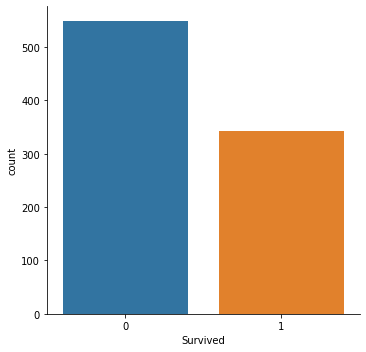

In [ ]:
# Part 2: 
# Import the seaborn library the conventional way. 
# Then optionally configure the default chart style. 
# Then, write the code needed to generate the visualizations specified.
 
import seaborn as sns

sns.catplot(x="Survived", kind="count", data=titanic)

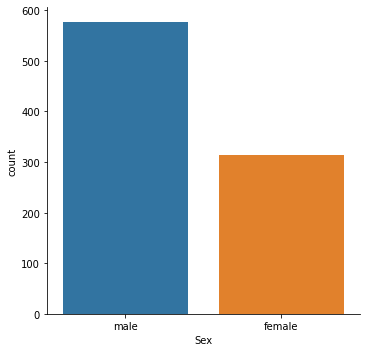

In [ ]:
sns.catplot(x="Sex", kind="count", data=titanic)

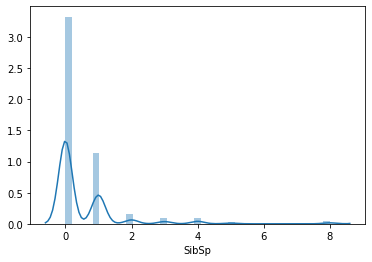

In [ ]:
sns.distplot(titanic.SibSp)

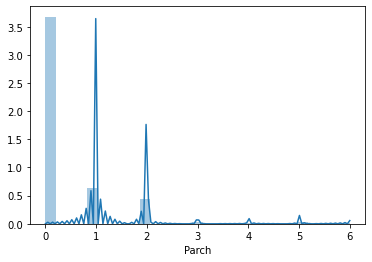

In [ ]:
sns.distplot(titanic.Parch)

## Part 3: Pairwise Comparisons
Using seaborn's barchart function we can look at how the survival distribution varied across different groups.

- Choose some features that you think might have had some influence over the likelihood of a titanic passenger surviving.

- For each of those features, generate visualizations using the [`barchart` function](https://seaborn.pydata.org/tutorial/categorical.html) to show the survival distributions.

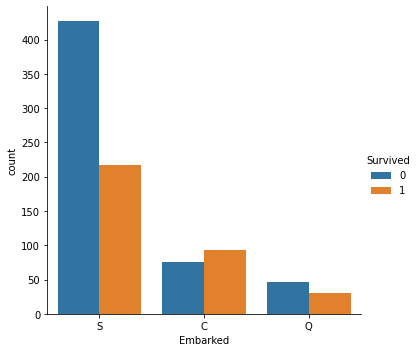

In [ ]:
# Write the code to explore how different features affect the survival distribution
sns.catplot(x="Embarked", hue="Survived", kind="count", data=titanic)

### Adding Another Dimension
Now, let's use the `hue` parameter to allow us to add a third dimension to our data.

- Choose pairs of features you think are interesting and chart them against the survival distribution.

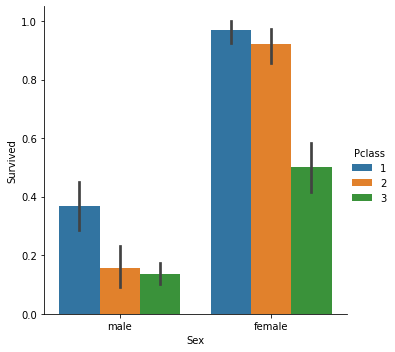

In [ ]:
# Write the code to visualize passenger survival rates based on two different features.
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=titanic)

## Part 4: Feature Engineering

The museum curator wonders if the passenger's rank and title might have anything to do with whether or not they survived. Since this information is embedded in their name, we'll use "feature engineering" to create two new columns:

- Title: The passenger's title
- Rank: A boolean (true/false) indicating if a passenger was someone of rank.

For the first new column, you'll need to find a way to [extract the title portion of their name](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html). Be sure to clean up any whitespace or extra punctuation.

For the second new column, you'll need to first look at a summary of your list of titles and decide what exactly constitutes a title of rank. Will you include military and eccelsiastical titles? Once you've made your decision, create the second column.

You may want to review prior Data Explorations for tips on creating new columns and checking for lists of values.

In [ ]:
# Enter the code needed to create the two new columns
#titanic["Name"].str.lower()
#titanic["Name"].str.split(",")

titanic['Title'] = titanic['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
titanic.head()

titanic['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Ms                1
Jonkheer          1
Mme               1
Capt              1
Sir               1
Don               1
Lady              1
Name: Title, dtype: int64

### Revisit Visualizations
Now that you have the new columns in place. Revisit the pairwise comparison plots to see if the new columns reveal any interesting relationships. Don't forget to check with and without different `hue` variations.

In [ ]:
# Enter the code needed to recheck the pairwise comparison. 
# Try different variations of the hue parameter.
titanic['Rank'] = titanic['Title'].isin(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Lady', 'Sir', 'Don', 'the Countess', 'Jonkheer'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Rank
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


### Simplifying Data
There appears to be a lot of different variations of similar titles. (such as abbreviations for Miss and Mademoiselle). 

Scan through the different titles to see which titles can be consolidated, then use what you know about data manipulation to simplify the distribution.

Once you've finished, check the visualizations again to see if that made any difference.

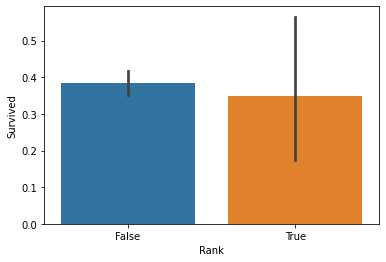

In [ ]:
# Enter the code needed to consolidate some of the different title variations 
# Recheck the pairwise distributions to see if it made a difference.
sns.barplot(data=titanic, x='Rank', y='Survived')

# Part 5: Conclusions

Based on your analysis, what interesting relationships did you find? Write three interesting facts the museum can use in their exhibit.

People without ranks increase your chance of dying from the Titanic. 

* 4.1
* 3.2
* 2.2


## 🌟 Above and Beyond 🌟

The museum curator has room for a couple of nice visualizations for the exhibit. 

1. Use Seaborn's customization features to clean up some of the more interesting visualizations to make them suitable for public display.

2. Use the [GeoPandas library](https://geopandas.org) to create a [Choropleth Map](https://geopandas.org/mapping.html#choropleth-maps) of the likelihood of a Titanic passenger surviving based on their port of embarkation.

In [ ]:
titanic['Title_Consolidated'] = titanic['Title'].map({
    'Mme': 'Miss',
    'Ms' : 'Mrs', # This could have gone into Miss as well, would probably need to research the trends of the time period
    'Mlle': 'Miss',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Jonkeer': 'Noble',
    'the Countess': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Don': 'Noble',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Rev': 'Rev',
    'Dr': 'Dr'
})

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Rank,Title_Consolidated
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,Mr
